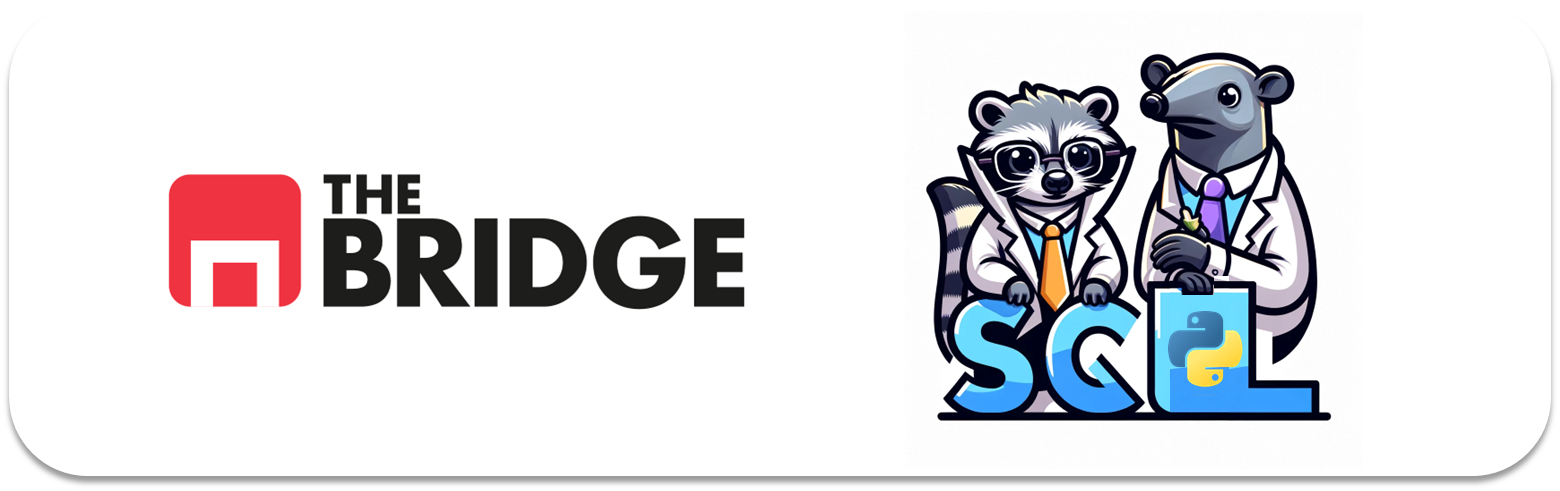

## PRACTICA OBLIGATORIA: SQL

* La práctica obligatoria de esta unidad consiste en jugar con varias tablas de una base de datos y practicar no solo con ellas sino con el método merge de Pandas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

In [1]:
import pandas as pd
import sqlite3

In [3]:
# nos conectamos a la base de datos 
connection = sqlite3.connect("./data/chinook.db")


cursor_practica1 = connection.cursor()



In [4]:
def sql_query(query):
    # Ejecuta la query
    cursor_practica1.execute(query) # Recuerda que sólo funcionará si has llamado cursor_bootcamp
                                    # a tu cursor, si no, cambia el nombre en todo el código de la función
    # Almacena los datos de la query 
    cursor = cursor_practica1.fetchall()
    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in cursor_practica1.description]# con los nombres que nos da el execute(lista de progresion)
    return pd.DataFrame(cursor,columns=names)

In [3]:
# que tablas tiene esta BD
resultado = cursor_practica1.execute("SELECT name FROM  sqlite_master WHERE type = 'table'")

resultado

In [4]:
# ahora recooremos terando con resultado para que nos devueva las tablas del la BBDD
tablas=[]
for name in resultado:
    if name[0]:
        tablas.append(name[0])
    print(name[0])

albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists
playlist_track
tracks
sqlite_stat1
films


VAMOS A SACAR INFO EN DF DE TODAS LAS TABLAS ( 14 QUERYS Y 1 TUVE QYE HACERLO CON EL METODO MANUL YA QUE READ_SQL DABA ERROR) Y HACER UN DIAGRAMA DE FLUJO DE LA BD, SIENDO SU RESULTADO DESPUES DE HABER HECHO LA CONSULTA DE INFORMACION:

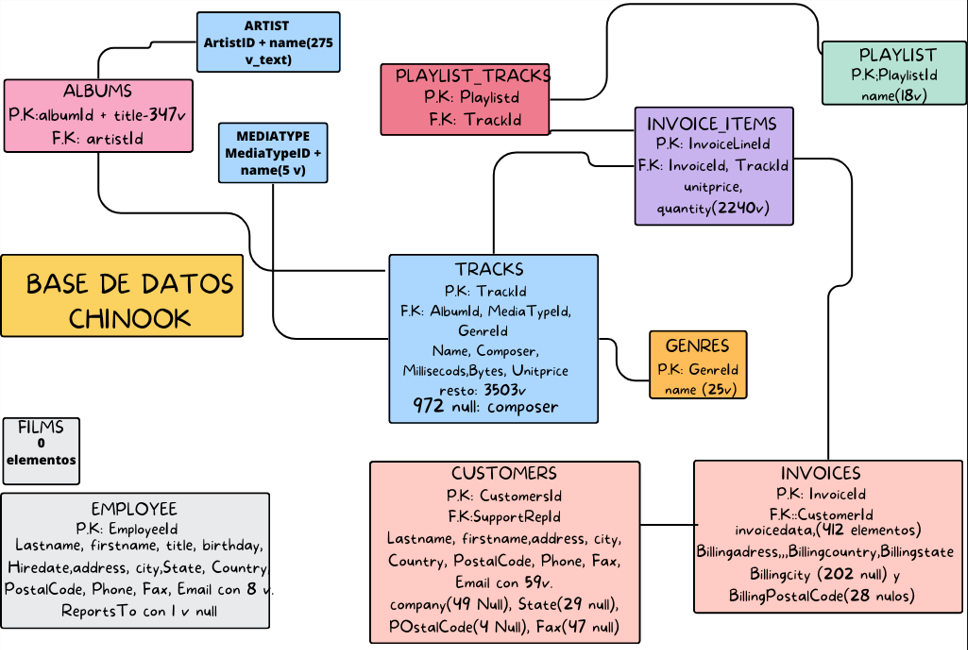

In [6]:
# hacemos la query para consultar varios datos
query1 = "SELECT * FROM sqlite_sequence"
# ejecutamos cursor para poder usar los distintos procesimientos
cursor_practica1.execute(query1)

In [6]:
cursor_practica1.fetchall()# nos devuelve toda la informacion nuemrica  de algunas tablas cursor_practica1.fetchall()# nos devuelve toda la informacion de algunas tablas

[('genres', 25),
 ('media_types', 5),
 ('artists', 275),
 ('albums', 347),
 ('tracks', 3503),
 ('employees', 8),
 ('customers', 59),
 ('invoices', 412),
 ('invoice_items', 2240),
 ('playlists', 18)]

In [7]:
df1=pd.read_sql(query1, connection)

In [12]:
df1

,tbl,idx,stat
0,tracks,IFK_TrackMediaTypeId,3503 701
1,tracks,IFK_TrackGenreId,3503 141
2,tracks,IFK_TrackAlbumId,3503 11
3,playlist_track,IFK_PlaylistTrackTrackId,8715 3
4,playlist_track,sqlite_autoindex_playlist_track_1,8715 623 1
5,albums,IFK_AlbumArtistId,347 2
6,artists,None,275
7,customers,IFK_CustomerSupportRepId,59 20
8,playlists,None,18
9,employees,IFK_EmployeeReportsTo,8 2


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10 non-null     object
 1   seq     10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [8]:
# hacemos la query para consultar varios datos
query2 = "SELECT * FROM sqlite_stat1"
# ejecutamos cursor para poder usar los distintos procesimientos
cursor_practica1.execute(query2)

In [9]:
cursor_practica1.fetchall()# nos devuelve toda la informacion nuemrica de algunas tablas las tablas que nos faltan

[('tracks', 'IFK_TrackMediaTypeId', '3503 701'),
 ('tracks', 'IFK_TrackGenreId', '3503 141'),
 ('tracks', 'IFK_TrackAlbumId', '3503 11'),
 ('playlist_track', 'IFK_PlaylistTrackTrackId', '8715 3'),
 ('playlist_track', 'sqlite_autoindex_playlist_track_1', '8715 623 1'),
 ('albums', 'IFK_AlbumArtistId', '347 2'),
 ('artists', None, '275'),
 ('customers', 'IFK_CustomerSupportRepId', '59 20'),
 ('playlists', None, '18'),
 ('employees', 'IFK_EmployeeReportsTo', '8 2'),
 ('genres', None, '25'),
 ('invoices', 'IFK_InvoiceCustomerId', '412 7'),
 ('media_types', None, '5'),
 ('invoice_items', 'IFK_InvoiceLineTrackId', '2240 2'),
 ('invoice_items', 'IFK_InvoiceLineInvoiceId', '2240 6')]

In [10]:
df2 = pd.read_sql(query2, connection)

In [11]:
df2

,tbl,idx,stat
0,tracks,IFK_TrackMediaTypeId,3503 701
1,tracks,IFK_TrackGenreId,3503 141
2,tracks,IFK_TrackAlbumId,3503 11
3,playlist_track,IFK_PlaylistTrackTrackId,8715 3
4,playlist_track,sqlite_autoindex_playlist_track_1,8715 623 1
5,albums,IFK_AlbumArtistId,347 2
6,artists,None,275
7,customers,IFK_CustomerSupportRepId,59 20
8,playlists,None,18
9,employees,IFK_EmployeeReportsTo,8 2


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tbl     15 non-null     object
 1   idx     11 non-null     object
 2   stat    15 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


DF1 Y DF2 APORTAN EL MISMO DATAFRAME PERO EN INFO A DF1 LE SALEM DOS COLUMNAS : NAME Y SEQ CON 10 ELEMENTOS CADA UNA
Y A DF3 LE SLAEN 3 COLUMNAS: TBL, IDX Y STAT CON 15, 11, 15 ELEMENTOS RESPECTIVAMENTE

In [13]:
query3 = ''' SELECT * FROM albums'''

cursor_practica1.execute(query3)

In [15]:
df_albums = pd.read_sql(query3, connection)
df_albums

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [42]:
df_albums.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


DF- ALBUMS APORTA UNA PRIMARY KEYS (AlbumId) , 1 COLUMNA TITLE Y UNA FOREIGN KEYS(ArtistID) CON 347 ELEMENTOS CADA UNO SIN NULOS

In [17]:
query_artists = ''' SELECT * FROM artists'''
cursor_practica1.execute(query_artists)


df_artist = pd.read_sql(query_artists, connection)
df_artist




,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


In [27]:
query_artists = ''' SELECT * FROM artists'''
cursor_practica1.execute(query_artists)

sql_query(query_artists)


,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


 ESTA COLUMNA DABA ERROR CON METODO DE PANDA READ_SQL TENIENDO QUE REALZIARLO MANUALMENTE.<BR>
 CONTIENE UNA PRIMARY KEYS(ArtistId) CON UNA COLUMNA STRING (name) CON 275 NOMBRE DE GRUPOS MUSICALES

In [187]:
query5 = ''' SELECT * FROM customers'''
cursor_practica1.execute(query5)

df_customers = pd.read_sql(query5, connection)
df_customers


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId,employeeId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,None
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5,None
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3,None
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4,None
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4,None
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5,None
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5,None
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4,None
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4,None
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4,None


In [55]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-null     object
 4   Address       59 non-null     object
 5   City          59 non-null     object
 6   State         30 non-null     object
 7   Country       59 non-null     object
 8   PostalCode    55 non-null     object
 9   Phone         58 non-null     object
 10  Fax           12 non-null     object
 11  Email         59 non-null     object
 12  SupportRepId  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


ESTE DF ES EL MAS AMPLIO EN COLUMNAS Y CONTENIDO.  APORTA MAS INFORMACION CON 13 COLUMNAS MAS UNA PRIMARY KEYS(CustomerId) Y UNA FOREIGN(SupportRepId), con 59 elementos cada una de ellas , EXISTIENDO 5 COLUMNAS CON NULL/NAN

In [30]:
query6 = ''' SELECT * FROM employees'''
cursor_practica1.execute(query6)

df_employees = pd.read_sql(query6, connection)
df_employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [45]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeId  8 non-null      int64  
 1   LastName    8 non-null      object 
 2   FirstName   8 non-null      object 
 3   Title       8 non-null      object 
 4   ReportsTo   7 non-null      float64
 5   BirthDate   8 non-null      object 
 6   HireDate    8 non-null      object 
 7   Address     8 non-null      object 
 8   City        8 non-null      object 
 9   State       8 non-null      object 
 10  Country     8 non-null      object 
 11  PostalCode  8 non-null      object 
 12  Phone       8 non-null      object 
 13  Fax         8 non-null      object 
 14  Email       8 non-null      object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+ KB


DF_EMPLOYEE ES EL QUE MAS COLUMNAS PRESENTA PERO MENOS CONTENDO CADA UNA DE ELLAS. ESTA COMPUESTO POR UNA PRIMACY KEYS(EmployeeId) y 13 COLUMNAS, CON UN TATAL DE 8 CADA UNA DE ELLAS ISN NULLOS

In [31]:
query7 = ''' SELECT * FROM genres'''
cursor_practica1.execute(query7)

df_genres = pd.read_sql(query7, connection)
df_genres


,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [46]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GenreId  25 non-null     int64 
 1   Name     25 non-null     object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


ESTA DF PRESENTA UNA PRIMARY KEY(GenreId)  Y 1 COLUMNA CON 25 OBJETOS CADA UNA DE ELLAS

In [32]:
query8 = ''' SELECT * FROM invoices'''
cursor_practica1.execute(query8)

df_invoices = pd.read_sql(query8, connection)
df_invoices


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [48]:
df_invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceId          412 non-null    int64  
 1   CustomerId         412 non-null    int64  
 2   InvoiceDate        412 non-null    object 
 3   BillingAddress     412 non-null    object 
 4   BillingCity        412 non-null    object 
 5   BillingState       210 non-null    object 
 6   BillingCountry     412 non-null    object 
 7   BillingPostalCode  384 non-null    object 
 8   Total              412 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 29.1+ KB


DF_INVOICE PRESENTA UNA PRIMARY KEY (invoiceId) y UNA FOREIGN KEY(CustomerId) MAS 7 COLUMNAS CON UN TOTAL DE 412 ELEMENTOS CADA UNA EXCEPTO LAS COLUMNAS: <BR>
"BillingState" QUE PRESENTA 202 VALORES NULL/NaN<BR> 
"BillingPostalCode" QUE PRESENTA 28 NULL/NaN

In [33]:
query9 = ''' SELECT * FROM invoice_items'''
cursor_practica1.execute(query9)

df_invoices_items = pd.read_sql(query9, connection)
df_invoices_items


,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
...,...,...,...,...,...
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1


In [49]:
df_invoices_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceLineId  2240 non-null   int64  
 1   InvoiceId      2240 non-null   int64  
 2   TrackId        2240 non-null   int64  
 3   UnitPrice      2240 non-null   float64
 4   Quantity       2240 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 87.6 KB


ESTE DF PRESENTA UNA PRIMACY KEY(InvoiceLineId) y DOS FOEIGN KEY (InvoiceId y TrackId) y 2  COLUMNAS FORMADAS CADA UNA DE ELLAS POR 2240 ELEMENTOS SIN NULOS

In [34]:
query10 = ''' SELECT * FROM media_types'''
cursor_practica1.execute(query10)

df_media_types = pd.read_sql(query10, connection)
df_media_types


,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [50]:
df_media_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MediaTypeId  5 non-null      int64 
 1   Name         5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


DF QUE PRESENTA UNA PRIMACY KEY (MediaTypeId)  Y UNA COLUMNA CON 5 VALORES NO NULOS CADA UNA DE ELLAS

In [36]:
query11 = ''' SELECT * FROM playlists '''
cursor_practica1.execute(query11)

df_playlists = pd.read_sql(query11, connection)
df_playlists

,PlaylistId,Name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music
5,6,Audiobooks
6,7,Movies
7,8,Music
8,9,Music Videos
9,10,TV Shows


In [54]:
df_playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PlaylistId  18 non-null     int64 
 1   Name        18 non-null     object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


DF FORMADO POR UNA PRIMARY KEY (PlaylistId) Y UNA COLUMNA CON 18 ELEMENTOS CADA UNA Y SIN NULOS

In [37]:
query12 = ''' SELECT * FROM playlist_track'''
cursor_practica1.execute(query12)

df_playlist_track = pd.read_sql(query12, connection)
df_playlist_track

,PlaylistId,TrackId
0,1,3402
1,1,3389
2,1,3390
3,1,3391
4,1,3392
...,...,...
8710,17,2094
8711,17,2095
8712,17,2096
8713,17,3290


In [53]:
df_playlist_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PlaylistId  8715 non-null   int64
 1   TrackId     8715 non-null   int64
dtypes: int64(2)
memory usage: 136.3 KB


DF CON UNA PRIMARY KEY(PlaylistId) Y UNA FOREIGN KEY(TrackId) FORMADA POR 8715 ELEMENTOS CADA UNA

In [38]:
query13 = ''' SELECT * FROM tracks'''
cursor_practica1.execute(query13)

df_tracks = pd.read_sql(query13, connection)
df_tracks

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [52]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2525 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


DF QUE PRESENTA UNA PRIMARY KEY(TrackId) y TRES FOREIGN KEY(AlbumId, MediaTypeId, GenreId)  MAS 5 COLUMNAS FORMADAS CADA UNA DE ELLAS POR 3503 SIN NULOS

In [39]:
query14 = ''' SELECT * FROM films'''
cursor_practica1.execute(query14)

df_films = pd.read_sql(query14, connection)
df_films

,id,title,release_year,country,duration,language,certification,gross,budget


In [51]:
df_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             0 non-null      object
 1   title          0 non-null      object
 2   release_year   0 non-null      object
 3   country        0 non-null      object
 4   duration       0 non-null      object
 5   language       0 non-null      object
 6   certification  0 non-null      object
 7   gross          0 non-null      object
 8   budget         0 non-null      object
dtypes: object(9)
memory usage: 124.0+ bytes


NO TIENE ELEMENTOS NINGUNO

VAMOS A REALZIAR ALGUNA CONSULTA TANTO CON SQL COMO MERGE


In [82]:
###SQL###

# Todos los elementos de la tabla customres donde no cuente los valores nulos que hay en Company, State, Fax y PostalCode y que me lo ordene por nombre y appledio el email de manera Descendente

query='''SELECT * 
FROM customers
WHERE Company   IS NOT NULL AND State IS NOT NULL AND Fax  IS NOT NULL AND PostalCode IS NOT NULL
ORDER BY Firstname DESC , Lastname DESC , Email DESC

'''

cursor_practica1.execute(query)
pd.read_sql(query, connection)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
1,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3
2,14,Mark,Philips,Telus,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,+1 (780) 434-4554,+1 (780) 434-5565,mphilips12@shaw.ca,5
3,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
4,15,Jennifer,Peterson,Rogers Canada,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,+1 (604) 688-2255,+1 (604) 688-8756,jenniferp@rogers.ca,3
5,17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
6,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
7,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
8,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5


In [84]:
######CON PANDAS#####, no se puede usar merge pq tda lainfo esta en un dataframe
# condiciones 
df_customers = df_customers.dropna(subset=["Company", "State", "Fax", "PostalCode"])

# Ordenar los resultados
df_customers = df_customers.sort_values(by=["FirstName", "LastName", "Email"], ascending=[False, False, False])

display(df_customers)


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
18,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
11,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3
13,14,Mark,Philips,Telus,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,+1 (780) 434-4554,+1 (780) 434-5565,mphilips12@shaw.ca,5
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
14,15,Jennifer,Peterson,Rogers Canada,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,+1 (604) 688-2255,+1 (604) 688-8756,jenniferp@rogers.ca,3
16,17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
15,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
10,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5


In [138]:
#### SQL### nuemero de canciones por albunes agrpados por albunes, ordenadas de manera descendiente condionadas a la columnas unitpricce y composer sin contar los nulos
query = '''
SELECT COUNT (*) AS canciones, AlbumId
FROM tracks
WHERE Unitprice AND Composer IS NOT NULL 
GROUP BY AlbumId 
ORDER BY canciones DESC

'''

cursor_practica1.execute(query)
pd.read_sql(query, connection)

,canciones,AlbumId
0,44,141
1,30,73
2,24,83
3,23,24
4,22,224
...,...,...
272,1,342
273,1,344
274,1,345
275,1,346


In [139]:
### con pandas ###


# condiciones
df_filtrado = df_tracks.loc[(df_tracks['Composer'].isna()) & (df_tracks["UnitPrice"])]

# Contar el número de canciones por AlbumId
df_count = df_filtrado.groupby("AlbumId").size().reset_index(name="canciones")

# Ordenar los resultados por canciones de forma descendente
df_count = df_count.sort_values(by="canciones", ascending=False)

display(df_count)

,AlbumId,canciones
7,23,34
55,229,26
56,230,25
62,251,25
63,253,24
...,...,...
69,260,1
64,254,1
52,226,1
34,108,1


JOINS

In [152]:
###VAMOS A REALZIAR UN LEFT JOINS EN SQL

query = '''
SELECT a.*, b.*
FROM customers AS a
LEFT JOIN invoices AS b
ON a.CustomerId = b.CustomerId
'''

cursor_practica1.execute(query)
df_consum_invoice = pd.read_sql(query, connection)
df_consum_invoice


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,...,SupportRepId,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,98,1,2010-03-11 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
1,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,121,1,2010-06-13 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
2,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,143,1,2010-09-15 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,5.94
3,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,195,1,2011-05-06 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,0.99
4,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,316,1,2012-10-27 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,...,3,45,59,2009-07-08 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,5.94
408,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,...,3,97,59,2010-02-26 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,1.99
409,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,...,3,218,59,2011-08-20 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,1.98
410,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,...,3,229,59,2011-09-30 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,13.86


In [153]:
df_consum_invoice.info()# me ha cerado un left join con yodas las columnas de customer y de invoce por la clave de conexion. Debido a esto se han creado nulos en las columnas company, aDRESS, CITY, sTATE, pOSTCODE, PHONE
#y billingPostalCode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         412 non-null    int64  
 1   FirstName          412 non-null    object 
 2   LastName           412 non-null    object 
 3   Company            70 non-null     object 
 4   Address            412 non-null    object 
 5   City               412 non-null    object 
 6   State              210 non-null    object 
 7   Country            412 non-null    object 
 8   PostalCode         384 non-null    object 
 9   Phone              405 non-null    object 
 10  Fax                84 non-null     object 
 11  Email              412 non-null    object 
 12  SupportRepId       412 non-null    int64  
 13  InvoiceId          412 non-null    int64  
 14  CustomerId         412 non-null    int64  
 15  InvoiceDate        412 non-null    object 
 16  BillingAddress     412 non

In [154]:
### con pandas merge######

#LEFT JOIN usando el método merge
df_consum_invoice_merge= pd.merge(df_customers, df_invoices, on="CustomerId", how="left")
df_consum_invoice_merge


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,...,Email,SupportRepId,InvoiceId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,...,tgoyer@apple.com,3,15,2009-03-04 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,1.98
1,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,...,tgoyer@apple.com,3,26,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
2,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,...,tgoyer@apple.com,3,81,2009-12-13 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,8.91
3,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,...,tgoyer@apple.com,3,210,2011-07-20 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,1.98
4,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,...,tgoyer@apple.com,3,233,2011-10-22 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,3.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,...,alero@uol.com.br,5,123,2010-06-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,8.91
59,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,...,alero@uol.com.br,5,252,2012-01-22 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,1.98
60,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,...,alero@uol.com.br,5,275,2012-04-25 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,3.96
61,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,...,alero@uol.com.br,5,297,2012-07-28 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,5.94


In [175]:
# UN RIGHT JOIN CON SQOL################################

In [16]:
query_right = '''
SELECT estilo_musical.*, canciones.*
FROM genres AS estilo_musical
RIGHT JOIN tracks AS canciones
ON estilo_musical.GenreId = canciones.GenreId
'''
cursor_practica1.execute(query_right)
df_genre_tracks = pd.read_sql(query_right, connection)
df_genre_tracks

,GenreId,Name,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,Rock,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,1,Rock,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,1,Rock,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,1,Rock,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,1,Rock,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...,...,...
3498,24,Classical,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,24,Classical,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,24,Classical,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,24,Classical,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [240]:
# UN RIGHT JOIN CON MERGE DE PANDAS#################

df_genre_tracks_merge= pd.merge(df_genres, df_tracks, on="GenreId", how="right")       ##### SE PODRIA PONER SUFFIXES = ("_TRACKS, _GENRES")( esto le pone sibfijos a las tablas en las columnas que son comunes, pero no puede cambaiarle el nombre directamente)
df_genre_tracks_merge

,GenreId,Name_x,TrackId,Name_y,AlbumId,MediaTypeId,Composer,Milliseconds,Bytes,UnitPrice
0,1,Rock,1,For Those About To Rock (We Salute You),1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,1,Rock,2,Balls to the Wall,2,2,None,342562,5510424,0.99
2,1,Rock,3,Fast As a Shark,3,2,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,1,Rock,4,Restless and Wild,3,2,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,1,Rock,5,Princess of the Dawn,3,2,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...,...
3498,24,Classical,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,None,286741,4718950,0.99
3499,24,Classical,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,Franz Schubert,139200,2283131,0.99
3500,24,Classical,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,Claudio Monteverdi,66639,1189062,0.99
3501,24,Classical,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [ ]:
# UN INNER CON ON SQOL################################

In [261]:
query_inner = '''
SELECT a.Name AS canciones, b.Name AS formato_audio
FROM Tracks AS a
INNER JOIN media_types AS b
ON a.MediaTypeId= a.MediaTypeId
'''

cursor_practica1.execute(query_inner)

df_inner = pd.read_sql(query_inner, connection)
df_inner

,canciones,formato_audio
0,For Those About To Rock (We Salute You),MPEG audio file
1,Balls to the Wall,MPEG audio file
2,Fast As a Shark,MPEG audio file
3,Restless and Wild,MPEG audio file
4,Princess of the Dawn,MPEG audio file
...,...,...
17510,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,AAC audio file
17511,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",AAC audio file
17512,"L'orfeo, Act 3, Sinfonia (Orchestra)",AAC audio file
17513,"Quintet for Horn, Violin, 2 Violas, and Cello ...",AAC audio file


In [ ]:
# UN INNER CON MERGE DE PANDAS#################

In [267]:
df_media_tracks_merge= pd.merge(df_media_types, df_tracks, on="MediaTypeId",  how="inner")

# cambio nombre de columnas
df_media_tracks_merge = df_media_tracks_merge.rename(columns={"Name_y":"canciones", "Name_x":"formato_audio"})

df_media_tracks_merge


,MediaTypeId,formato_audio,TrackId,canciones,AlbumId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,MPEG audio file,1,For Those About To Rock (We Salute You),1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,1,MPEG audio file,6,Put The Finger On You,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
2,1,MPEG audio file,7,Let's Get It Up,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
3,1,MPEG audio file,8,Inject The Venom,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
4,1,MPEG audio file,9,Snowballed,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
...,...,...,...,...,...,...,...,...,...,...
3498,5,AAC audio file,3355,Love Comes,265,1,"Darius ""Take One"" Minwalla/Jon Auer/Ken String...",199923,3240609,0.99
3499,5,AAC audio file,3356,Muita Bobeira,266,7,Luciana Souza,172710,2775071,0.99
3500,5,AAC audio file,3357,OAM's Blues,267,2,Aaron Goldberg,266936,4292028,0.99
3501,5,AAC audio file,3358,One Step Beyond,264,15,Karsh Kale,366085,6034098,0.99


In [ ]:
# UN FULL JOIN CON SQL ########################

In [338]:

query_full = '''
SELECT a.Title,b.Name AS canciones
FROM  Albums AS a
LEFT JOIN tracks AS b
ON a.AlbumId = b.AlbumId
UNION ALL
SELECT a.Name AS estilo_musical , b.Name AS canciones
FROM Genres AS a
RIGHT JOIN Tracks AS b
ON a.GenreId =b.GenreId
'''

cursor_practica1.execute(query_full)
df_full_join= pd.read_sql(query_full, connection)
df_full_join

,Title,canciones
0,For Those About To Rock We Salute You,For Those About To Rock (We Salute You)
1,For Those About To Rock We Salute You,Put The Finger On You
2,For Those About To Rock We Salute You,Let's Get It Up
3,For Those About To Rock We Salute You,Inject The Venom
4,For Those About To Rock We Salute You,Snowballed
...,...,...
7001,Classical,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...
7002,Classical,"String Quartet No. 12 in C Minor, D. 703 ""Quar..."
7003,Classical,"L'orfeo, Act 3, Sinfonia (Orchestra)"
7004,Classical,"Quintet for Horn, Violin, 2 Violas, and Cello ..."


In [ ]:
# UN FULLJOIN  CON MERGE DE PANDAS#################

In [340]:
# LEFT JOIN entre Albums y artists
df_left_join = pd.merge(df_albums, df_tracks, on='AlbumId', how='left')

# RIGHT JOIN entre Genres y tracks
df_right_join = pd.merge(df_genres, df_tracks,on='GenreId', how='right')

# Combina ambos resultados con merge
df_full_Join_merge = pd.merge(df_left_join, df_right_join, how='outer')

df_full_Join_merge


,AlbumId,Title,ArtistId,TrackId,Name,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,Name_x,Name_y
0,1,For Those About To Rock We Salute You,1,1,For Those About To Rock (We Salute You),1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock (We Salute You)
1,1,For Those About To Rock We Salute You,1,6,Put The Finger On You,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,Rock,Put The Finger On You
2,1,For Those About To Rock We Salute You,1,7,Let's Get It Up,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,Rock,Let's Get It Up
3,1,For Those About To Rock We Salute You,1,8,Inject The Venom,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,Rock,Inject The Venom
4,1,For Those About To Rock We Salute You,1,9,Snowballed,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,Rock,Snowballed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,343,Respighi:Pines of Rome,226,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,2,24,None,286741,4718950,0.99,Classical,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...
3499,344,Schubert: The Late String Quartets & String Qu...,272,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",2,24,Franz Schubert,139200,2283131,0.99,Classical,"String Quartet No. 12 in C Minor, D. 703 ""Quar..."
3500,345,Monteverdi: L'Orfeo,273,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",2,24,Claudio Monteverdi,66639,1189062,0.99,Classical,"L'orfeo, Act 3, Sinfonia (Orchestra)"
3501,346,Mozart: Chamber Music,274,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,"Quintet for Horn, Violin, 2 Violas, and Cello ..."


BASES DE DATOS

In [404]:
# CREAR UNA(CREATE TABLE)

In [376]:
connection = sqlite3.connect("BD_practica_1.db")

In [409]:
#me creo un cursor
cursor_BD1 = connection.cursor()

In [394]:
query_salario = '''
CREATE TABLE Clave_Maestro (
    ID        INT PRIMARY KEY, 
    EDAD_I    INT NOT NULL,
    EDAD_F    INT NOT NULL,
    INGRESOS  DECIMAL(10,2) NOT NULL, -- hasta 10 nuemro sdecimales pero detras dela coma solo 2
    PROFESION VARCHAR(50)
)
'''

cursor_BD1.execute(query_salario)
connection.commit()


In [405]:
# USAR INSERT INTO

In [414]:


sueldos = {
    1: (20, 30, 22000, "Data Scientist"),
    2: (31, 40, 35000, "Data Scientist"),
    3: (41, 50, 50000, "Data Scientist")

}

for indice,(edad_i, edad_f , ingresos, profesion) in sueldos.items():

    query_sueldos = f"INSERT INTO Clave_Maestro (ID,EDAD_I, EDAD_F,INGRESOS, PROFESION) VALUES ({indice+1},{edad_i},{edad_f}, {ingresos},'{profesion}')"
    display(query_sueldos)
    cursor_BD1.execute(query_sueldos)



"INSERT INTO Clave_Maestro (ID,EDAD_I, EDAD_F,INGRESOS, PROFESION) VALUES (2,20,30, 22000,'Data Scientist 1')"

IntegrityError: UNIQUE constraint failed: Clave_Maestro.ID

In [418]:
# converrido a DF
#tradicional

query_df = '''
SELECT * FROM Clave_Maestro
'''
cursor_BD1.execute(query_df)
info = cursor_BD1.fetchall()
col = [description[0] for description in cursor_BD1.description]
df_salarios = pd.DataFrame(info, columns = col)
df_salarios

# rapida con panda:

pd.read_sql("SELECT * FROM Clave_Maestro", connection)


,ID,EDAD_I,EDAD_F,INGRESOS,PROFESION
0,2,20,30,22000,Data Scientist
1,3,31,40,35000,Data Scientist
2,4,41,50,55000,Data Scientist


In [ ]:
# ACTUALZIAR BD CON UPDATE

In [413]:
query_sueldos_update ='''
UPDATE Clave_Maestro
SET ingresos= 55000
WHERE edad_i = 41
'''

# ejecucion del cursor
cursor_BD1.execute(query_sueldos_update)
#commit
connection.commit()

# comprobamos el cambio
pd.read_sql("SELECT* FROM Clave_Maestro", connection)

,ID,EDAD_I,EDAD_F,INGRESOS,PROFESION
0,2,20,30,22000,Data Scientist
1,3,31,40,35000,Data Scientist
2,4,41,50,55000,Data Scientist


In [436]:
query_sueldos_update2 ='''
UPDATE Clave_Maestro
SET profesion = "Data Scientist 1"
WHERE edad_i = 20;

UPDATE Clave_Maestro
SET profesion = "Data Scientist 2"
WHERE edad_i= 31;

UPDATE Clave_Maestro
SET profesion = "Data Scientist 3"
WHERE edad_i = 41;
'''

# ejecucion del cursor para multiples actualizaciones en vez de execute
cursor_BD1.executescript(query_sueldos_update2)

#commit
connection.commit()

# comprobamos el cambio
pd.read_sql("SELECT* FROM Clave_Maestro", connection)

,ID,EDAD_I,EDAD_F,INGRESOS,PROFESION
0,2,20,30,22000,Data Scientist 1
1,3,31,40,35000,Data Scientist 2
2,4,41,50,55000,Data Scientist 3


In [ ]:
# USAR DELETE FRON CON WHERE PARA ELIMINAR FILAS DE LA BD


In [441]:
query_delete_w = '''
DELETE FROM Clave_Maestro
WHERE profesion = "Data Scientist 1"
'''
# ejecucion del cursor execute
cursor_BD1.execute(query_delete_w)

connection.commit()

#comprobamos el cambio
pd.read_sql("SELECT* FROM Clave_Maestro", connection)

,ID,EDAD_I,EDAD_F,INGRESOS,PROFESION
0,3,31,40,35000,Data Scientist 2
1,4,41,50,55000,Data Scientist 3


In [ ]:
# USAR ALTER TABLE CON DROP PARA ELMINAR COLUMNAS(no hace falta gacer commit)

In [445]:
query_del_columna = '''
ALTER TABLE Clave_Maestro
DROP COLUMN edad_i
'''

# ejecucion del cursor execute
cursor_BD1.execute(query_del_columna)

#comprobamos el cambio
pd.read_sql("SELECT* FROM Clave_Maestro", connection)

OperationalError: no such column: "edad_i"

In [449]:
# BOPRRADO DE TABLAS CON DROP TABLE

In [450]:
query_delete_total = '''
DELETE FROM Clave_Maestro
'''

# ejecucion del cursor execute
cursor_BD1.execute(query_delete_total)

connection.commit()

#comprobamos el cambio
pd.read_sql("SELECT* FROM Clave_Maestro", connection)

,ID,EDAD_F,INGRESOS,PROFESION
